In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df=pd.read_csv("train.csv")
print(df.shape)
print(df.columns)
data=df.values
x=data[:,1:]
y=data[:,0]

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [43]:
#splitting into training and testing data
split=int(0.8*(x.shape[0]))             #get 80%data to training set and rest to testing set
print(split)

x_train=x[:split,:]
y_train=y[:split]

x_test=x[split:,:]
y_test=y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


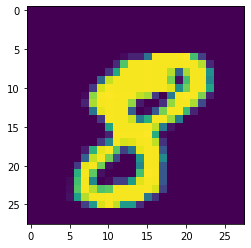

8


In [47]:
#Visualizing dataset
def imgs(sample):
    t=sample.reshape(28,28)
    plt.imshow(t)
    plt.show()

imgs(x_train[10])
print(y[10])

In [54]:
#applying knn
def dist(x1,x2):
    return np.sqrt(sum(x1-x2)**2)

def knn(x,y,querypoint,k=5):
    vals=[]
    m=x.shape[0]
    for i in range(m):
        d=dist(querypoint,x[i])
        vals.append((d,y[i]))
     
    vals=sorted(vals)
    vals=vals[k:]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [55]:
#making predictions
pred=knn(x_train,y_train,x_test[0])
print(pred)

1.0


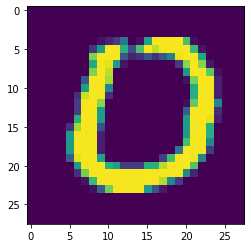

0


In [58]:
imgs(x_test[0])
print(y_test[0])